<figure>
<img src="../imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
    <img src="../imagenes/Foto Alvaro Montenegro.png" width="40" height="40" align="right" /> 
</figure>

# <span style="color:#4361EE"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Simposio Internacional de Estadística 2024</center></span>

## <span style="color:green"><center>Minicurso de Inteligencia Artificial Moderna - Taller 3.1<center></span>

### <span style="color:green"><center>Autocodificador Variacional: FashionMNIST</center></span>

<figure>
<center>
<img src="../Imagenes/vae-diagram-1-1024x563.jpg" width="600" height="600" align="center"/>
</center>
</figure>

Fuente: [LearnOpenCV](https://learnopencv.com/variational-autoencoder-in-tensorflow/)

# <span style="color:#4361EE">Profesor</span>

## <span style="color:#4361EE">Alvaro  Mauricio Montenegro Díaz, Ph.D.</span>

## <span style="color:#4361EE">Introducción </span>

Para este taller utilizaremos los datos de FashioMNIST y la implementación esta hecha en Pytorch. El código fue generado con ChatGPT con el siguiente prompt:

## <span style="color:#4361EE">VAE</span>

Nuestro autocodificador (autoencoder) variacional (VAE) tendrá variables latentes gaussianas y una distribución posterior gaussiana   $q_{\phi}(\boldsymbol{z}|\boldsymbol{x})$  con una matriz de covarianza diagonal.

Recordemos que  un VAE de cuatro elementos escenciales:

1. Una  variable  latente $\boldsymbol{z}$ con distribución  $p(\boldsymbol{z})$  que en nuestro caso será una variable  aleatoria Gaussiana con media cero y varianza 1 y que denotamos   $\epsilon$.
2. Un decodificador(decoder)  $p(\boldsymbol{x}|\boldsymbol{z})$  que mapea las  variables latentes  $\boldsymbol{z}$  a variables observables $\boldsymbol{x}$. En este ejemplo este codificador implementa un perceptrón multicapa (MLP), en este caso una red neuronal con una capa oculta. Activación Tanh para tener la misma escala de los datos normalizadas de entrada.
3. Un codificador (encoder)  $q_{\phi}(\boldsymbol{z}|\boldsymbol{x})$  que mapea ejemplos de entrada al espacio latente. Como se está construyendo un autoencoder variacional se tiene que este mapeo se hace generando muestras aleatorias de distribciones Gaussianas con medias y varianzas que dependen de  la entrada:   $q_{\phi}(\boldsymbol{z}|\boldsymbol{x})=N(\boldsymbol{z},\boldsymbol{\mu}(x),\text{diag}(\boldsymbol{\sigma}^2(\boldsymbol{x})))$. 
4. Una función de costo que tiene dos términos: el  error de construcción que corresponde al modelo generativo implementado en el decoder y un término adicional de regularización que minimiza la divergencia KL. El error de reconstrucción es medido por el error cuadrático medio y la divergencia por el término
$-D_{KL}(q_{\phi}(\boldsymbol{z}|\boldsymbol{x})|p(\boldsymbol{z}))=\tfrac{1}{2}\sum_{j=1}^{J}(1+\log \boldsymbol{\sigma}^2_j(\boldsymbol{x})-\boldsymbol{\mu}^2_j(\boldsymbol{x})-\boldsymbol{\sigma}^2_j(\boldsymbol{x}))$.

## <span style="color:#4361EE">El truco de la reparametrización</span>

Los gradientes de propagación hacia atrás no pueden pasar por el bloque de muestreo estocástico. Si bien está bien tener entradas estocásticas para redes neuronales, no es posible  pasar los gradientes por una capa estocástica. La solución a este problema es eliminar el proceso de muestreo como entrada, como se muestra en el lado derecho de la siguiente figura. 

Desde el punto de vista estadístico, esto es bastante simple. Se usa la representación estocástica clásica de una distribución normal multivariada asi:

1. Genera una muestra $\boldsymbol{\epsilon} \sim \mathcal{N}_m(\mathbf{0}, \mathbf{I})$.
2. Obtiene $\mathbf{z} =\boldsymbol{\mu} + \boldsymbol{\epsilon} \odot  \boldsymbol{\sigma}$.

En consecuencia $\mathbf{z}\sim \mathcal{N}_m(\boldsymbol{\mu},\text{diag}( \boldsymbol{\sigma}^2))$.

## <span style="color:#4361EE">El algortimo VAE para FashionMnist</span>

1. Un lote de datos $\boldsymbol{x}$ se transforma del espacio de entrada de tamaño image_size = 784 = 28*28,  a un espacio oculto intermedio (hidden) de tamaño hidden_dim = 512. Activación = ReLU.
2. Se hacen dos proyecciones lineales hacia el espacio latente de tamaño latent_dim = 10.
3. Una proyección se usara como representación de $\boldsymbol{\mu}(\boldsymbol{x})$ y el otro como representación de $\log \boldsymbol{\sigma}^2(\boldsymbol{x})$
4. Usando el truco de la reparametrización se genera un muestra $\boldsymbol{z}\sim \mathcal{N}(\boldsymbol{\mu}(\boldsymbol{x}), \boldsymbol{\sigma}^2(\boldsymbol{x}))$.
5. Se reconstruye la entrada (parte generativa). Esta recosntrucción se denota $\boldsymbol{x}^*$. Para lograrlo se proyecta el vector latente $\boldsymbol{z}$ al espacio intermedio de tamaño  hidden_dim = 512. Activación = ReLU.
7. En seguida se proyecta linealmente al espacio original de tamaño image_size = 784 = 28*28 y se usa activación sigmoide para llevar a la escala original (0,1).
8. Función de pérdida.
   1. Del modelo de probabilidad: MSE = $\tfrac{1}{K} \sum_k||\boldsymbol{x}_k^* - \boldsymbol{x}_k||^2$, en donde $K$ es el tamaño del lote de datos.
   2. Se calcula el regularizador, que es, la Divergencia entre la distrubución verdadera $Q$ y la distribción aproximante $P$; LK= $-D_{KL}(q_{\phi}(\boldsymbol{z}|\boldsymbol{x})|p(\boldsymbol{z}))=\tfrac{1}{2}\sum_{j=1}^{J}(1+\log \boldsymbol{\sigma}^2_j(\boldsymbol{x})-\boldsymbol{\mu}^2_j(\boldsymbol{x})-\boldsymbol{\sigma}^2_j(\boldsymbol{x}))$.
   3. Pérdida total: L = MSE + LK.
      

## <span style="color:#4361EE">El código</span>

Explicación de la Estructura del código

1. `Clase DataPreparation`: Se encarga de preparar y cargar los datos de entrenamiento y prueba
2. `Clase ConvVAE`: Define el modelo VAE convolucional con sus métodos de codificación, decodificación y reparametrización.
3. `Clase Trainer`: Gestiona el entrenamiento del modelo, calcula las pérdidas y almacena las pérdidas de entrenamiento y prueba.
4. `Clase LossPlotter`: Dibuja la gráfica de las pérdidas de entrenamiento y prueba.
5. `Clase ImagePlotter`: Muestra las imágenes originales y reconstruidas.

In [ ]:
# imports
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [ ]:
# Clase DataPreparation
class DataPreparation:
    def __init__(self, batch_size):
        self.batch_size = batch_size

    def prepare_data(self):
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

        train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
        test_loader = DataLoader(test_dataset, batch_size=self.batch_size, shuffle=True)

        return train_loader, test_loader

In [ ]:
# clase ConvVAE
class ConvVAE(nn.Module):
    def __init__(self, latent_dim):
        super(ConvVAE, self).__init__()
        self.latent_dim = latent_dim
        
        # Encoder
        self.enc_conv1 = nn.Conv2d(1, 32, 4, 2, 1)  # 28x28 -> 14x14
        self.enc_conv2 = nn.Conv2d(32, 64, 4, 2, 1)  # 14x14 -> 7x7
        self.enc_fc1 = nn.Linear(64 * 7 * 7, 512)
        self.enc_mu = nn.Linear(512, latent_dim)
        self.enc_logvar = nn.Linear(512, latent_dim)
        
        # Decoder
        self.dec_fc1 = nn.Linear(latent_dim, 512)
        self.dec_fc2 = nn.Linear(512, 64 * 7 * 7)
        self.dec_conv1 = nn.ConvTranspose2d(64, 32, 4, 2, 1)  # 7x7 -> 14x14
        self.dec_conv2 = nn.ConvTranspose2d(32, 1, 4, 2, 1)  # 14x14 -> 28x28

    def encode(self, x):
        h = F.relu(self.enc_conv1(x))
        h = F.relu(self.enc_conv2(h))
        h = h.view(h.size(0), -1)
        h = F.relu(self.enc_fc1(h))
        mu = self.enc_mu(h)
        logvar = self.enc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = F.relu(self.dec_fc1(z))
        h = F.relu(self.dec_fc2(h))
        h = h.view(h.size(0), 64, 7, 7)
        h = F.relu(self.dec_conv1(h))
        return torch.tanh(self.dec_conv2(h))

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

In [ ]:
# Clase Trainer
class Trainer:
    def __init__(self, model, train_loader, test_loader, optimizer, epochs):
        self.model = model
        self.train_loader = train_loader
        self.test_loader = test_loader
        self.optimizer = optimizer
        self.epochs = epochs
        self.train_losses = []
        self.test_losses = []

    def loss_function(self, recon_x, x, mu, logvar):
        MSE = F.mse_loss(recon_x, x, reduction='sum')
        KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
        return MSE + KLD

    def train(self):
        for epoch in range(self.epochs):
            self.model.train()
            train_loss = 0
            for batch_idx, (data, _) in enumerate(self.train_loader):
                data = data.to(device)
                self.optimizer.zero_grad()
                recon_batch, mu, logvar = self.model(data)
                loss = self.loss_function(recon_batch, data, mu, logvar)
                loss.backward()
                train_loss += loss.item()
                self.optimizer.step()
            train_loss /= len(self.train_loader.dataset)
            self.train_losses.append(train_loss)

            # Evaluar el modelo en el conjunto de datos de prueba
            self.model.eval()
            test_loss = 0
            with torch.no_grad():
                for data, _ in self.test_loader:
                    data = data.to(device)
                    recon_batch, mu, logvar = self.model(data)
                    loss = self.loss_function(recon_batch, data, mu, logvar)
                    test_loss += loss.item()
            test_loss /= len(self.test_loader.dataset)
            self.test_losses.append(test_loss)

            print(f'Epoch {epoch + 1}, Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}')

In [ ]:
# clase  LossPlotter
class LossPlotter:
    def __init__(self, train_losses, test_losses):
        self.train_losses = train_losses
        self.test_losses = test_losses

    def plot_losses(self):
        plt.figure(figsize=(10, 5))
        plt.plot(self.train_losses, label='Train Loss')
        plt.plot(self.test_losses, label='Test Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.title('Train and Test Loss over Epochs')
        plt.show()

In [ ]:
# clase ImagePloter
class ImagePlotter:
    def __init__(self, model, test_loader):
        self.model = model
        self.test_loader = test_loader

    def plot_images(self):
        self.model.eval()
        with torch.no_grad():
            data_iter = iter(self.test_loader)
            images, _ = next(data_iter)
            images = images[:20].to(device)  # Obtener las primeras 20 imágenes
            recon_images, _, _ = self.model(images)

        # Desnormalizar las imágenes para visualización
        images = images.cpu().numpy()
        recon_images = recon_images.cpu().numpy()

        images = images * 0.5 + 0.5  # Desnormalizar
        recon_images = recon_images * 0.5 + 0.5  # Desnormalizar

        # Mostrar las imágenes originales y reconstruidas
        fig, axes = plt.subplots(4, 10, figsize=(15, 6))
        for i in range(20):
            axes[i // 5, (i % 5) * 2].imshow(images[i].reshape(28, 28), cmap='gray')
            axes[i // 5, (i % 5) * 2].axis('off')
            axes[i // 5, (i % 5) * 2 + 1].imshow(recon_images[i].reshape(28, 28), cmap='gray')
            axes[i // 5, (i % 5) * 2 + 1].axis('off')

        plt.tight_layout()
        plt.show()

In [ ]:
# Configuración
# Hiperparámetros
batch_size = 128
learning_rate = 1e-3
epochs = 50
latent_dim = 20

# Verificar si hay una GPU disponible
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") # MAC OS
#device = torch.device("cuda" if torch.backends.mps.is_available() else "cpu") # LINUX O WONDOWS con GPU NVIDIA

Epoch 1, Train Loss: 120.110527, Test Loss: 79.045863
Epoch 2, Train Loss: 73.009421, Test Loss: 69.616241
Epoch 3, Train Loss: 67.178801, Test Loss: 65.866717
Epoch 4, Train Loss: 64.510539, Test Loss: 63.948505
Epoch 5, Train Loss: 62.809333, Test Loss: 62.912985
Epoch 6, Train Loss: 61.647666, Test Loss: 61.865688
Epoch 7, Train Loss: 60.753465, Test Loss: 61.213148
Epoch 8, Train Loss: 60.023387, Test Loss: 60.619941
Epoch 9, Train Loss: 59.462281, Test Loss: 60.710241
Epoch 10, Train Loss: 58.998410, Test Loss: 59.683469
Epoch 11, Train Loss: 58.538875, Test Loss: 59.000890
Epoch 12, Train Loss: 58.189720, Test Loss: 59.045670
Epoch 13, Train Loss: 57.821325, Test Loss: 58.738180
Epoch 14, Train Loss: 57.578363, Test Loss: 58.476549
Epoch 15, Train Loss: 57.278235, Test Loss: 58.311917
Epoch 16, Train Loss: 57.025560, Test Loss: 58.278139
Epoch 17, Train Loss: 56.808013, Test Loss: 57.898846
Epoch 18, Train Loss: 56.564831, Test Loss: 57.872090
Epoch 19, Train Loss: 56.377908, Tes

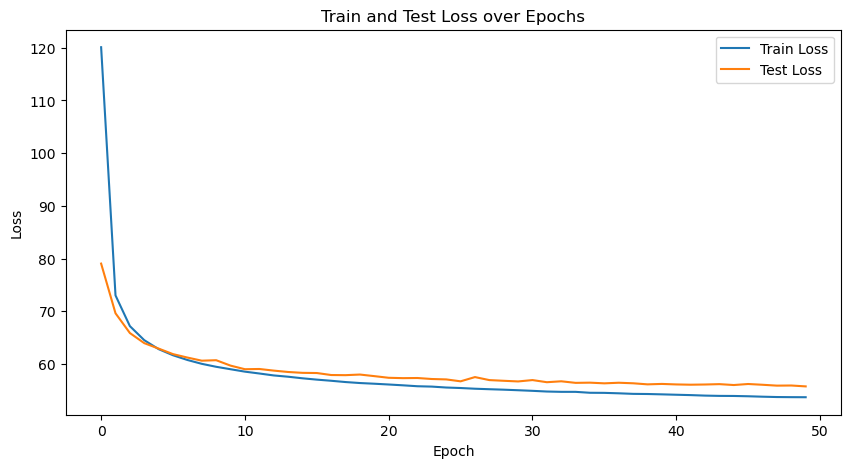

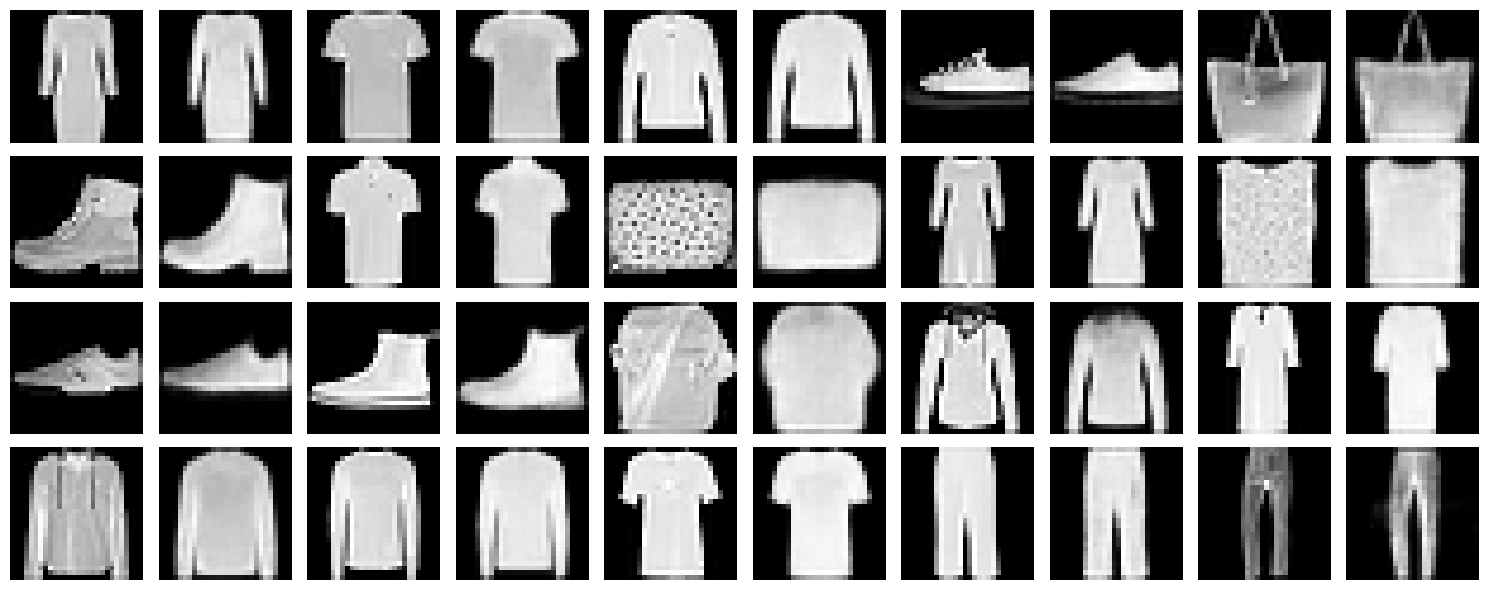

In [ ]:
# Programa principal - run

# Preparar los datos
data_preparation = DataPreparation(batch_size)
train_loader, test_loader = data_preparation.prepare_data()

# Inicializar el modelo y el optimizador
model = ConvVAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Entrenar el modelo
trainer = Trainer(model, train_loader, test_loader, optimizer, epochs)
trainer.train()

# Dibujar las pérdidas
loss_plotter = LossPlotter(trainer.train_losses, trainer.test_losses)
loss_plotter.plot_losses()

# Dibujar las imágenes originales y reconstruidas
image_plotter = ImagePlotter(model, test_loader)
image_plotter.plot_images()

Para hacer: 
1. Corra el entrenamiento con más iteraciones.
2. Cambie todos los titulos para que todo sea español.